In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

In [6]:
final = pd.read_csv('8100 with network.csv', index_col = 'Unnamed: 0', engine='python')

# merge // get train and validation sets (get only the accounts labeled)

In [7]:
model_data = final.copy()
final.head()

,trade_go,trade_come,buy_from_shop,sell_to_shop,buy_from_personal_shop,sell_to_person,mail_go,mail_come,invite,join,revival,fight,friend_num,friend_num_change_count,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,login_total_day,sit_count_perday,login_total_day.1,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count,class
0,2,4,72,196,0,6,1,21,7,58,2,0,0,0,259,637926,0,42528.40000,0,270,389149580,4686,376,47,30,51,15,18.000000,15,2076.600000,312.400000,0.000000,25.066667,8862,0.000423,0.000074,0.000047,0.013892,0.000589,2463.034749,610.023075,2835.226667,0.000000,0.196911,0.000000,10289.129030,0
1,1,0,34,111,0,1,0,56,16,35,0,0,0,0,38,401885,42,28706.07143,0,153,80119427,1596,343,32,75,75,14,10.928571,14,4398.500000,114.000000,0.000000,24.500000,69458,0.000381,0.000080,0.000187,0.172831,0.000853,10575.921050,199.359088,2050.433674,1.105263,1.973684,3.642857,68.197013,0
2,12,9,31,338,0,0,2,3,5,46,1,1,4,2,43,240334,38,17166.71429,0,378,142485377,1318,337,35,53,69,14,27.000000,14,1763.285714,94.142857,0.000000,24.071429,43619,0.001573,0.000146,0.000221,0.181493,0.001402,5589.162791,592.864002,1226.193878,0.883721,1.604651,9.947368,2477.670103,0
3,111,37,11,504,0,0,0,0,0,0,0,0,0,0,25,1205493,0,80366.20000,0,207,1377552887,7979,44,0,12,10,15,13.800000,15,7319.666667,531.933333,0.000000,2.933333,0,0.000172,0.000000,0.000010,0.000000,0.000036,48219.720000,1142.729893,5357.746667,0.000000,0.400000,0.000000,0.000000,0
4,74,57,68,254,0,0,21,35,85,98,1,25,0,0,110,457433,0,30495.53333,0,320,395099069,3551,568,311,109,261,15,21.333333,15,6557.866667,236.733333,0.066667,37.866667,40934,0.000700,0.000680,0.000238,0.089486,0.001242,4158.481818,863.731014,2033.035555,0.000000,2.372727,0.000000,5717.912500,0


In [8]:
x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

# Create new columns

In [10]:
# Measure how patient the player is
m = model_data['sit_count'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['sit_count/play_time'] = m

[[1.         0.07671107]
 [0.07671107 1.        ]]


In [11]:
# the lesser you get killed by a player the more likely you are to be a bot
m = model_data['killed_by_pc'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['killed_by_pc/play_time'] = m

[[ 1.         -0.08847992]
 [-0.08847992  1.        ]]


In [12]:
# similar with above
m = model_data['killed_by_npc'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['killed_by_npc/play_time'] = m

[[ 1.         -0.07269662]
 [-0.07269662  1.        ]]


In [13]:
# How organized the palyer is 
m = model_data['total_party_time'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['total-party_time/play_time'] = m

[[ 1.         -0.13955735]
 [-0.13955735  1.        ]]


In [14]:
# How impatient the player is
m = model_data['teleport_count'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['teleport_count/play_time'] = m

[[ 1.        -0.1037434]
 [-0.1037434  1.       ]]


In [15]:
# How often the player takes a real rest
m = model_data['play_time'] / model_data['login_count'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['play_time/login_count'] = m

[[1.         0.21377834]
 [0.21377834 1.        ]]


In [16]:
# How efficient the player is 
m = model_data['exp_get_amout'] / model_data['play_time'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['exp_get_amount/play_time'] = m

[[ 1.         -0.24696058]
 [-0.24696058  1.        ]]


In [17]:
# How efficient the player is 
m = model_data['playtime_per_day'] / model_data['login_total_day'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['playtime_per_day/login_total_day'] = m

[[1.        0.3985221]
 [0.3985221 1.       ]]


In [18]:
# How efficient the player is 
m = model_data['max_level'] / model_data['login_count'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['max_level/login_count'] = m

[[1.        0.1213195]
 [0.1213195 1.       ]]


In [19]:
# How efficient the player is 
m = model_data['reborn_count'] / model_data['login_count'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['reborn_count/login_count'] = m

[[1.         0.19802241]
 [0.19802241 1.        ]]


In [20]:
# Humans do not sit a a lot when the level is high level
m = model_data['sit_count'] / model_data['max_level'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['sit_count/max_level'] = m

[[1.         0.23390367]
 [0.23390367 1.        ]]


In [23]:
# Bots do not finish quest
m = model_data['play_time'] / model_data['question_count'] 
m[m == np.inf] = 0
m[np.isnan(m)] = 0
print(np.corrcoef(m, y))
model_data['play_time/question_count'] = m

KeyError: 'question_count'

## Do this automatically

In [18]:
for i in model_data:
    for j in model_data:
        m = model_data[j] / model_data[i] 
        m[m == np.inf] = 0
        m[np.isnan(m)] = 0
        x = np.corrcoef(m, y)[0][1]
        if abs(x) > 0.10:
            print(j, i, x)

trade_go trade_go -0.1520121626237575
join trade_go -0.11624647420081018
login_total_day trade_go -0.1299513852941161
login_total_day.1 trade_go -0.1299513852941161
killed_by_npc/play_time trade_go -0.10130670190309418
teleport_count/play_time trade_go -0.12342902813651274
exp_get_amount/play_time trade_go -0.11925146412936313
class trade_go 0.275428295437926
trade_come trade_come -0.15732949571419794
join trade_come -0.12411034330989962
login_total_day trade_come -0.11181491516726756
login_total_day.1 trade_come -0.11181491516726756
teleport_count/play_time trade_come -0.12123497226337716
exp_get_amount/play_time trade_come -0.11850943395959126
class trade_come 0.34399941053129285
buy_from_shop buy_from_shop -0.31064106937961916
class buy_from_shop 0.31618180612517577
sell_to_shop sell_to_shop -0.3248559159409243
class sell_to_shop 0.17894741222809216
buy_from_personal_shop buy_from_personal_shop -0.10734484678080258
class buy_from_personal_shop 0.11786293638215545
class sell_to_perso

sit_count sit_count_perday -0.1295604792895981
class sit_count_perday 0.1631818778519017
sell_to_shop login_total_day.1 0.172193559813104
join login_total_day.1 -0.1236086539462947
friend_num login_total_day.1 -0.11556118924550214
friend_num_change_count login_total_day.1 -0.10556036874709615
play_time login_total_day.1 0.37617105253640504
max_level login_total_day.1 0.1895100261275035
playtime_per_day login_total_day.1 0.39852210366918156
sit_count login_total_day.1 0.2524534038544859
money_get_count login_total_day.1 0.25373024166973573
killed_by_npc login_total_day.1 0.10922358881673706
reborn_count login_total_day.1 0.17493672765861615
sit_count_perday login_total_day.1 0.3323758157339417
item_get_count_perday login_total_day.1 0.11117769924396902
money_get_count_perday login_total_day.1 0.25914544169557496
teleport_count_perday login_total_day.1 0.1423286678162228
total_party_time login_total_day.1 -0.11602267490165438
play_time/login_count login_total_day.1 0.22997378499204357
pl

## Correlation Cofficient 
    1. Actor_account is a dummy variable. Any variable that has a lower contribution than actor_account should be deleted
    2. Exp_repair_count a single value of 1. This should be deleted

In [28]:
for i in range(0, len(x.columns)):
    # if abs(np.corrcoef(x.iloc[:,i], y)[0,1]) > abs(np.corrcoef(x.iloc[:,0], y)[0,1]):
        print(x.columns[i], np.corrcoef(x.iloc[:,i], y)[0,1])

trade_go 0.07627902787900571
trade_come 0.020495588062673292
buy_from_shop 0.0053414321847798625
sell_to_shop 0.15874166187487895
buy_from_personal_shop -0.03347688996888057
sell_to_person -0.008902743787032341
mail_go -0.009129336773353827
mail_come -0.09380914394930975
invite -0.13162551179985849
join -0.19658465422891647
revival -0.0432020449496919
fight -0.09324558233225991
friend_num -0.1648412385439968
friend_num_change_count -0.14614295059997498
login_count -0.05176935312645623
play_time 0.14294229185493673
max_level 0.09093472319491794
playtime_per_day 0.3749819266878865
abyss -0.05265469802125319
sit_count 0.12388508464235856
exp_get_amout -0.1173443843921652
money_get_count 0.18601811721751835
teleport_count -0.04554341869495464
killed_by_pc -0.03356950907126272
killed_by_npc -0.000961437516115119
reborn_count 0.08461633300186429
login_total_day -0.1470422031819528
sit_count_perday 0.24494453878892117
login_total_day.1 -0.1470422031819528
item_get_count_perday 0.0758910372350

In [23]:
x = model_data.drop(['class'], axis=1)

In [24]:
x.head()

,trade_go,trade_come,buy_from_shop,sell_to_shop,buy_from_personal_shop,sell_to_person,mail_go,mail_come,invite,join,revival,fight,friend_num,friend_num_change_count,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,login_total_day,sit_count_perday,login_total_day.1,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count
0,2,4,72,196,0,6,1,21,7,58,2,0,0,0,259,637926,0,42528.40000,0,270,389149580,4686,376,47,30,51,15,18.000000,15,2076.600000,312.400000,0.000000,25.066667,8862,0.000009,0.000074,0.000047,0.013892,0.000589,2463.034749,610.023075,2835.226667,0.000000,0.196911,0.000000,10289.129030
1,1,0,34,111,0,1,0,56,16,35,0,0,0,0,38,401885,42,28706.07143,0,153,80119427,1596,343,32,75,75,14,10.928571,14,4398.500000,114.000000,0.000000,24.500000,69458,0.000002,0.000080,0.000187,0.172831,0.000853,10575.921050,199.359088,2050.433674,1.105263,1.973684,3.642857,68.197013
2,12,9,31,338,0,0,2,3,5,46,1,1,4,2,43,240334,38,17166.71429,0,378,142485377,1318,337,35,53,69,14,27.000000,14,1763.285714,94.142857,0.000000,24.071429,43619,0.000000,0.000146,0.000221,0.181493,0.001402,5589.162791,592.864002,1226.193878,0.883721,1.604651,9.947368,2477.670103
3,111,37,11,504,0,0,0,0,0,0,0,0,0,0,25,1205493,0,80366.20000,0,207,1377552887,7979,44,0,12,10,15,13.800000,15,7319.666667,531.933333,0.000000,2.933333,0,0.000000,0.000000,0.000010,0.000000,0.000036,48219.720000,1142.729893,5357.746667,0.000000,0.400000,0.000000,0.000000
4,74,57,68,254,0,0,21,35,85,98,1,25,0,0,110,457433,0,30495.53333,0,320,395099069,3551,568,311,109,261,15,21.333333,15,6557.866667,236.733333,0.066667,37.866667,40934,0.000000,0.000680,0.000238,0.089486,0.001242,4158.481818,863.731014,2033.035555,0.000000,2.372727,0.000000,5717.912500


## Lasso (Model Based Feature Selection)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

lasso = Lasso().fit(x_train, y_train)

print('{:.3f}'.format(lasso.score(x_train, y_train)))
print('{:.3f}'.format(lasso.score(x_test, y_test)))

0.393
0.351


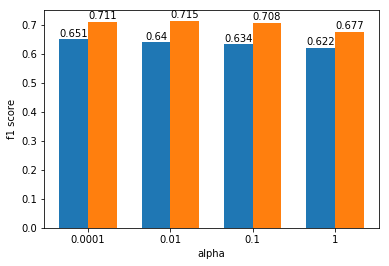

In [38]:
import matplotlib.pyplot as plt

alpha_set = [0.0001, 0.01, 0.1, 1]
max_inter_set = [10000000, 100000, 10000, 1000]

train_score = []
test_score = []
used_feature = []

for a, m in zip(alpha_set, max_inter_set):
    lasso_tr_y = lasso.predict(x_train)
    lasso_t_y = lasso.predict(x_test)
    lasso = Lasso(alpha=a, max_iter=m).fit(x_train, y_train)
    la_tr_score = np.round(f1_score((lasso.predict(x_train) > np.percentile(lasso_tr_y, 93)).astype(int), y_train), 3)
    la_te_score = np.round(f1_score((lasso.predict(x_test) > np.percentile(lasso_t_y, 93)).astype(int), y_test), 3)
    number_used = np.sum(lasso.coef_ != 0)

    train_score.append(la_tr_score)
    test_score.append(la_te_score)
    used_feature.append(number_used)

index = np.arange(len(alpha_set))
bar_width = 0.35
plt.bar(index, train_score, width=bar_width, label='train')
plt.bar(index+bar_width, test_score, width=bar_width, label='test')
plt.xticks(index+bar_width/2, alpha_set) # bar그래프 dodge를 하기 위해 기준값에 보정치를 더해줍니다.


for i, (ts, te) in enumerate(zip(train_score, test_score)):
    plt.text(i, ts+0.01, str(ts), horizontalalignment='center')
    plt.text(i+bar_width, te+0.01, str(te), horizontalalignment='center')

# plt.legend(loc=1, )
plt.xlabel('alpha')
plt.ylabel('f1 score')
plt.show()

## Results of Feature Selection by Lasso

In [35]:
# when alpha is 1

lasso = Lasso(alpha=1, max_iter=1000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

sell_to_shop 1.0787606036274763e-05
login_count -1.6502110250086403e-05
play_time -5.358218853369479e-07
playtime_per_day 1.3586629182433984e-05
sit_count 5.810869204614198e-06
exp_get_amout -2.2132527862195992e-10
money_get_count 3.8269216982205245e-06
teleport_count -5.907326721244294e-06
item_get_count_perday -1.0201045597943019e-07
money_get_count_perday 1.542631911771281e-05
total_party_time -6.067085349304105e-07
play_time/login_count -2.74526075055341e-06
exp_get_amount/play_time -7.053037032234127e-06
playtime_per_day/login_total_day -2.9036069393914888e-06
play_time/question_count 2.1520921842404645e-07


In [36]:
# when alpha is 0.1

lasso = Lasso(alpha=0.1, max_iter=10000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

mail_come -0.0001295483902698996
invite -5.971527485795435e-05
join -0.0003796000238588174
friend_num -0.00015590636134385618
killed_by_pc -8.044232269739395e-05
reborn_count 9.376943433763548e-05
sit_count_perday 0.0002463646819615919
sit_count/max_level 0.0002442437923443973


In [37]:
# when alpha is 0.01

lasso = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

sell_to_person -0.00022620123498122237
mail_go 0.00022561685606623663
mail_come -0.00031347579618996185
join -0.000346308842388747
revival -0.0008087571157743917
friend_num -0.00025181171409216014
friend_num_change_count -0.0012627679214076751
teleport_count 0.00010531377419110418
killed_by_pc -0.00013546099522228979
reborn_count 0.00020906245123516505
login_total_day 0.001446252408121659
sit_count_perday 0.00027136585115890527
login_total_day.1 0.00018764183820863878
teleport_count_perday -0.002606288660489448
max_level/login_count 0.001097434211732968
sit_count/max_level 0.00042432017526110647


# Lasso is not a powerful model. Try Xgboost

In [39]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [41]:
xgb_model = xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=6,
                        max_depth=5,
                        learning_rate=0.1,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        min_child_weight=1,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        tree_method='gpu_hist')

In [42]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=-999, n_estimators=1000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [43]:
prediction = xgb_model.predict(x_test)

In [44]:
f1_score(y_test, prediction)

0.845679012345679

In [66]:
xgb_model.feature_importances_

array([0.01859891, 0.01113294, 0.01950118, 0.02826962, 0.0070103 ,
       0.0158763 , 0.01635959, 0.01684664, 0.02188235, 0.15847051,
       0.04404476, 0.03127013, 0.0188575 , 0.00841033, 0.01950771,
       0.02106288, 0.02301039, 0.02819418, 0.        , 0.01192633,
       0.01350981, 0.00931548, 0.00953152, 0.00759066, 0.00749854,
       0.00866976, 0.02813937, 0.01171139, 0.019811  , 0.01217451,
       0.0101565 , 0.00895606, 0.00730703, 0.00846863, 0.02983165,
       0.00792171, 0.0094362 , 0.0105971 , 0.01464526, 0.02037361,
       0.03353982, 0.10202299, 0.01091957, 0.00616154, 0.0358378 ,
       0.03563993], dtype=float32)

<BarContainer object of 46 artists>

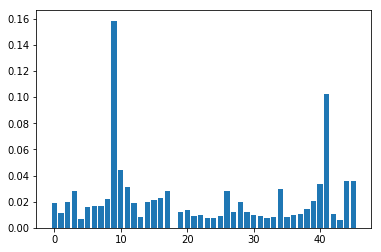

In [67]:
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)

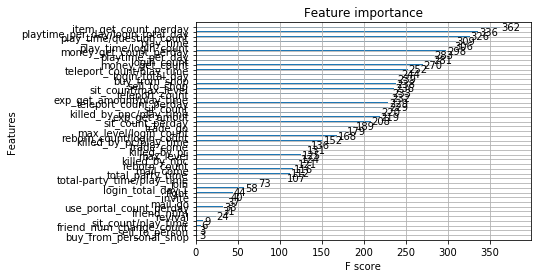

<Figure size 144000x7200 with 0 Axes>

In [68]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb_model)
pyplot.figure(figsize=(2000,100))
pyplot.show()

In [64]:
xgb_model.feature_importances_

array([0.01859891, 0.01113294, 0.01950118, 0.02826962, 0.0070103 ,
       0.0158763 , 0.01635959, 0.01684664, 0.02188235, 0.15847051,
       0.04404476, 0.03127013, 0.0188575 , 0.00841033, 0.01950771,
       0.02106288, 0.02301039, 0.02819418, 0.        , 0.01192633,
       0.01350981, 0.00931548, 0.00953152, 0.00759066, 0.00749854,
       0.00866976, 0.02813937, 0.01171139, 0.019811  , 0.01217451,
       0.0101565 , 0.00895606, 0.00730703, 0.00846863, 0.02983165,
       0.00792171, 0.0094362 , 0.0105971 , 0.01464526, 0.02037361,
       0.03353982, 0.10202299, 0.01091957, 0.00616154, 0.0358378 ,
       0.03563993], dtype=float32)

In [60]:
for i in range(0, len(x.columns)):
    print(x.columns[i],  xgb_model.feature_importances_[i])

trade_go 0.018598914
trade_come 0.011132939
buy_from_shop 0.019501176
sell_to_shop 0.028269615
buy_from_personal_shop 0.0070102997
sell_to_person 0.015876302
mail_go 0.01635959
mail_come 0.016846642
invite 0.021882353
join 0.15847051
revival 0.044044763
fight 0.031270128
friend_num 0.0188575
friend_num_change_count 0.008410325
login_count 0.019507712
play_time 0.021062879
max_level 0.02301039
playtime_per_day 0.028194176
abyss 0.0
sit_count 0.011926325
exp_get_amout 0.013509813
money_get_count 0.009315477
teleport_count 0.009531521
killed_by_pc 0.007590656
killed_by_npc 0.007498543
reborn_count 0.008669757
login_total_day 0.028139373
sit_count_perday 0.011711393
login_total_day.1 0.019811004
item_get_count_perday 0.012174506
money_get_count_perday 0.010156499
use_portal_count_perday 0.008956064
teleport_count_perday 0.0073070275
total_party_time 0.008468625
sit_count/play_time 0.02983165
killed_by_pc/play_time 0.007921712
killed_by_npc/play_time 0.009436204
total-party_time/play_time 0

Varables to exclude
1. buy_from_personal_shop
2. friend_num_change_count
3. sell_to_person
4. trade_come
5. mail_go

# Creating Final Training Data

In [69]:
final_data = pd.DataFrame

In [73]:
# Through inspection of each columns
final_data = model_data[['trade_go', 'buy_from_shop', 'sell_to_shop', 'mail_come', 'invite', 'join', 'revival', 'fight', 'friend_num', 'login_count', 'play_time', 'max_level', "playtime_per_day", 'abyss', 'sit_count', 'exp_get_amout', 'money_get_count', 'teleport_count', 'killed_by_pc', 'killed_by_npc', 'reborn_count', 'sit_count_perday', 'login_total_day', 'item_get_count_perday', 'money_get_count_perday', 'use_portal_count_perday', 'teleport_count_perday', 'total_party_time', 'sit_count/play_time', 'killed_by_pc/play_time', 'killed_by_npc/play_time', 'total-party_time/play_time', 'teleport_count/play_time', 'play_time/login_count', 'exp_get_amount/play_time', 'playtime_per_day/login_total_day', 'max_level/login_count', 'reborn_count/login_count', 'sit_count/max_level', 'play_time/question_count', ]]

In [74]:
final_data['class'] = y

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
final_data.to_csv('data_beta.csv')